## things to consider in Statistics

1- not just use decribe()/ explain the mean or every column
2- make comparison about corelations between columns, heatmap can help.DO REGRESSIONA ANALYSIS
3-create subction: q-test 
4- do a summary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import seaborn as sns


## License of irish dataset:
https://creativecommons.org/licenses/by/4.0/

In [2]:
#getting json info of NaPTAN
naptan_irl_json = "https://www.transportforireland.ie/transitData/naptan.json"
response = requests.get(naptan_irl_json)

In [3]:
#check the response
response

<Response [200]>

In [4]:
# Parse the JSON response
data = response.json()
data

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'AtcoCode': '7010PB003857',
    'CommonName': 'Ballymagrorty',
    'CommonNameGA': 'B Mhic Robhartaigh',
    'ShortCommonName': 'Ballymagrorty',
    'ShortCommonNameGA': 'B Mhic Robhartaigh',
    'NptgLocalityRef': 'E0701003',
    'Easting': 641057,
    'Northing': 920841,
    'Latitude': 55.0334043,
    'Longitude': -7.3577718,
    'StopType': 'BCT',
    'BusStopType': 'CUS',
    'TimingStatus': 'OTH',
    'CompassPoint': 'NW',
    'AdministrativeAreaRef': 701,
    'Status': 'active',
    'CreationDateTime': '1969-12-31T00:00:00.000',
    'ModificationDateTime': '2021-06-01T16:08:18.000'},
   'geometry': {'type': 'Point', 'coordinates': [-7.3577718, 55.0334043]}},
  {'type': 'Feature',
   'properties': {'AtcoCode': '7010PB003858',
    'CommonName': 'Coshquin',
    'NptgLocalityRef': 'E0701003',
    'Easting': 641054,
    'Northing': 920860,
    'Latitude': 55.0335753,
    'Longitude': -7.3578159,
    'St

<h1>Data pre-processing of irish dataset 🇮🇪</h1>

In [5]:
from pandas import json_normalize

#Use json_normalize to flatten the nested structure
df_ireland = json_normalize(data['features'])

#Display the DataFrame
df_ireland.head(20)

,type,properties.AtcoCode,properties.CommonName,properties.CommonNameGA,properties.ShortCommonName,properties.ShortCommonNameGA,properties.NptgLocalityRef,properties.Easting,properties.Northing,properties.Latitude,...,properties.CompassPoint,properties.AdministrativeAreaRef,properties.Status,properties.CreationDateTime,properties.ModificationDateTime,geometry.type,geometry.coordinates,properties.Street,properties.PlateCode,properties.StopAreaRef
0,Feature,7010PB003857,Ballymagrorty,B Mhic Robhartaigh,Ballymagrorty,B Mhic Robhartaigh,E0701003,641057,920841,55.033404,...,NW,701,active,1969-12-31T00:00:00.000,2021-06-01T16:08:18.000,Point,"[-7.3577718, 55.0334043]",NaN,NaN,NaN
1,Feature,7010PB003858,Coshquin,NaN,NaN,NaN,E0701003,641054,920860,55.033575,...,N,701,active,1969-12-31T00:00:00.000,2016-10-28T15:12:27.000,Point,"[-7.3578159, 55.0335753]",NaN,NaN,NaN
2,Feature,7010PB003859,Culmore Point,NaN,NaN,NaN,E0701003,646370,922263,55.045712,...,N,701,active,1969-12-31T00:00:00.000,1969-12-31T23:00:00.000,Point,"[-7.2744401, 55.0457123]",Culmore Road,NaN,NaN
3,Feature,7010PB003860,Culmore Point,NaN,NaN,NaN,E0701003,646379,922262,55.045702,...,N,701,active,1969-12-31T00:00:00.000,1969-12-31T23:00:00.000,Point,"[-7.2742994, 55.0457025]",Culmore Road,NaN,NaN
4,Feature,7010B158131,Ulsterbus Depot,Busáras Ulsterbus,Ulsterbus Depot,Busáras Ulsterbus,E0701001,643648,916772,54.996629,...,N,701,active,2000-01-01T00:00:00.000,2021-06-17T18:10:53.000,Point,"[-7.3178663, 54.9966288]",NaN,158131.0,NaN
5,Feature,701000002,Patrick Street,Sráid Phádraig,Patrick Street,Sráid Phádraig,E0701001,643337,917142,54.999980,...,N,701,active,2020-05-07T00:00:00.000,2021-06-29T11:19:32.000,Point,"[-7.3226703, 54.9999799]",NaN,NaN,NaN
6,Feature,701000001,Water Street,Sráid an Uisce,Water Street,Sráid an Uisce,E0701001,643683,916710,54.996069,...,N,701,active,2016-10-04T00:00:00.000,2021-06-24T13:56:41.000,Point,"[-7.3173289, 54.9960687]",NaN,NaN,NaN
7,Feature,701000004,Dungiven,Dún Geimhin,Dungiven,Dún Geimhin,E0701001,669220,909127,54.925058,...,S,701,active,2019-10-18T00:00:00.000,2021-06-28T12:45:01.000,Point,"[-6.9201336, 54.9250579]",NaN,NaN,NaN
8,Feature,701000005,Dungiven,Dún Geimhin,Dungiven,Dún Geimhin,E0701001,669288,909066,54.924501,...,N,701,active,2019-10-18T00:00:00.000,2021-06-28T12:45:39.000,Point,"[-6.9190877, 54.9245005]",NaN,NaN,NaN
9,Feature,701000003,Guild Hall,Halla Guild,Guild Hall,Halla Guild,E0701001,643562,916870,54.997517,...,N,701,active,2019-10-18T00:00:00.000,2021-06-29T11:14:08.000,Point,"[-7.3191953, 54.9975167]",NaN,NaN,NaN


In [6]:
#checking the shape of the table
df_ireland.shape

(16491, 24)

In [7]:
#check columns name
df_ireland.columns

Index(['type', 'properties.AtcoCode', 'properties.CommonName',
       'properties.CommonNameGA', 'properties.ShortCommonName',
       'properties.ShortCommonNameGA', 'properties.NptgLocalityRef',
       'properties.Easting', 'properties.Northing', 'properties.Latitude',
       'properties.Longitude', 'properties.StopType', 'properties.BusStopType',
       'properties.TimingStatus', 'properties.CompassPoint',
       'properties.AdministrativeAreaRef', 'properties.Status',
       'properties.CreationDateTime', 'properties.ModificationDateTime',
       'geometry.type', 'geometry.coordinates', 'properties.Street',
       'properties.PlateCode', 'properties.StopAreaRef'],
      dtype='object')

In [8]:
#drop column 'type' before using for loop
df_ireland.drop(['type'], axis=1,inplace=True)

In [9]:
#use of foor loop to rename columns
for column in df_ireland.columns:
    new_column_name = column.split('.')[1]
    df_ireland.rename(columns={column: new_column_name},inplace=True)

In [10]:
#checking change with tail() function
df_ireland.head()

,AtcoCode,CommonName,CommonNameGA,ShortCommonName,ShortCommonNameGA,NptgLocalityRef,Easting,Northing,Latitude,Longitude,...,CompassPoint,AdministrativeAreaRef,Status,CreationDateTime,ModificationDateTime,type,coordinates,Street,PlateCode,StopAreaRef
0,7010PB003857,Ballymagrorty,B Mhic Robhartaigh,Ballymagrorty,B Mhic Robhartaigh,E0701003,641057,920841,55.033404,-7.357772,...,NW,701,active,1969-12-31T00:00:00.000,2021-06-01T16:08:18.000,Point,"[-7.3577718, 55.0334043]",NaN,NaN,NaN
1,7010PB003858,Coshquin,NaN,NaN,NaN,E0701003,641054,920860,55.033575,-7.357816,...,N,701,active,1969-12-31T00:00:00.000,2016-10-28T15:12:27.000,Point,"[-7.3578159, 55.0335753]",NaN,NaN,NaN
2,7010PB003859,Culmore Point,NaN,NaN,NaN,E0701003,646370,922263,55.045712,-7.274440,...,N,701,active,1969-12-31T00:00:00.000,1969-12-31T23:00:00.000,Point,"[-7.2744401, 55.0457123]",Culmore Road,NaN,NaN
3,7010PB003860,Culmore Point,NaN,NaN,NaN,E0701003,646379,922262,55.045702,-7.274299,...,N,701,active,1969-12-31T00:00:00.000,1969-12-31T23:00:00.000,Point,"[-7.2742994, 55.0457025]",Culmore Road,NaN,NaN
4,7010B158131,Ulsterbus Depot,Busáras Ulsterbus,Ulsterbus Depot,Busáras Ulsterbus,E0701001,643648,916772,54.996629,-7.317866,...,N,701,active,2000-01-01T00:00:00.000,2021-06-17T18:10:53.000,Point,"[-7.3178663, 54.9966288]",NaN,158131.0,NaN


In [11]:
#check data types
df_ireland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16491 entries, 0 to 16490
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   AtcoCode               16491 non-null  object 
 1   CommonName             16491 non-null  object 
 2   CommonNameGA           13536 non-null  object 
 3   ShortCommonName        13579 non-null  object 
 4   ShortCommonNameGA      13192 non-null  object 
 5   NptgLocalityRef        16491 non-null  object 
 6   Easting                16491 non-null  int64  
 7   Northing               16491 non-null  int64  
 8   Latitude               16491 non-null  float64
 9   Longitude              16491 non-null  float64
 10  StopType               16491 non-null  object 
 11  BusStopType            15675 non-null  object 
 12  TimingStatus           15821 non-null  object 
 13  CompassPoint           15675 non-null  object 
 14  AdministrativeAreaRef  16491 non-null  int64  
 15  St

In [12]:
#checking null values for the whole table
df_ireland.isnull().sum()

AtcoCode                    0
CommonName                  0
CommonNameGA             2955
ShortCommonName          2912
ShortCommonNameGA        3299
NptgLocalityRef             0
Easting                     0
Northing                    0
Latitude                    0
Longitude                   0
StopType                    0
BusStopType               816
TimingStatus              670
CompassPoint              816
AdministrativeAreaRef       0
Status                      0
CreationDateTime            0
ModificationDateTime       28
type                        0
coordinates                 0
Street                   9739
PlateCode                3943
StopAreaRef              7615
dtype: int64

<br>
<ul>   
  <li>CommonNameGA column is the gaelic version of CommonName column, so it will be possible to fill the null values with new ones.It is necessary to use the library googletrans.</li><br>
  <li>ShortCommonName is not a relevant column, because it is the same as CommonName</li><br>
  <li>ShortCommonNameGA is not a relevant column, because it is the same as ShortCommonName</li><br>
</ul>


In [13]:
#pip install googletrans==4.0.0-rc1 IT HAS AN ERROR OF TIME OUT
#pip install translate

In [14]:
#Drop columns that are not relevant
df_ireland.drop(['ShortCommonName'], axis=1,inplace=True)
df_ireland.drop(['ShortCommonNameGA'], axis=1,inplace=True)
df_ireland.drop(['CommonNameGA'], axis=1,inplace=True)
df_ireland.drop(['type'], axis=1,inplace=True)

#In this case it is going to drop just null rows in BusStopType column
df_ireland.dropna(subset=['BusStopType'],inplace=True)
df_ireland.dropna(subset=['PlateCode'],inplace=True)
df_ireland.dropna(subset=['StopAreaRef'],inplace=True)

In [15]:
#after dropping there is a new shape
df_ireland.shape


(6881, 19)

In [17]:
columns_to_fill_from = [
    'CommonName'
]

# Fill missing values in 'Street' using values from specified columns
df_ireland['Street'] = df_ireland['Street'].fillna(df_ireland[columns_to_fill_from].apply(lambda row: next((val for val in row if pd.notna(val)), None), axis=1))


In [18]:
# The column PlateCode has many repeated values.
value_counts_ireland = df_ireland['PlateCode'].value_counts()
print('print values and occurrences: ',value_counts_ireland)

#The next line will show which values has repeated number
repeated_values_ireland = value_counts_ireland[value_counts_ireland > 1]
print('\n')#to make space between prints
print('print list of values with occurence more than 1: ',repeated_values_ireland.unique())

# Create a new DataFrame with only rows where the specified column has unique values
df_ireland = df_ireland[df_ireland['PlateCode'].isin(value_counts_ireland[value_counts_ireland == 1].index)]

print values and occurrences:  PlateCode
100.0       2
631071.0    1
3037.0      1
134432.0    1
7669.0      1
           ..
4690.0      1
4327.0      1
4341.0      1
4344.0      1
107491.0    1
Name: count, Length: 6880, dtype: int64


print list of values with occurence more than 1:  [2]


In [19]:
df_ireland.isnull().sum()

AtcoCode                 0
CommonName               0
NptgLocalityRef          0
Easting                  0
Northing                 0
Latitude                 0
Longitude                0
StopType                 0
BusStopType              0
TimingStatus             0
CompassPoint             0
AdministrativeAreaRef    0
Status                   0
CreationDateTime         0
ModificationDateTime     0
coordinates              0
Street                   0
PlateCode                0
StopAreaRef              0
dtype: int64

In [20]:
#dataset ready to use for machine learning and statistics.
df_ireland.head()

,AtcoCode,CommonName,NptgLocalityRef,Easting,Northing,Latitude,Longitude,StopType,BusStopType,TimingStatus,CompassPoint,AdministrativeAreaRef,Status,CreationDateTime,ModificationDateTime,coordinates,Street,PlateCode,StopAreaRef
75,7050B631071,Loughview Drive,E0705002,608455,838742,54.297374,-7.870114,BCT,MKD,OTH,S,705,active,1969-12-31T00:00:00.000,2022-10-10T11:13:22.000,"[-7.8701145, 54.2973739]",Pearse Road,631071.0,851G000022
116,8210B5981201,Carlow IT,E0821025,671692,675986,52.830054,-6.936121,BCT,MKD,OTH,NE,821,active,2000-01-01T00:00:00.000,2020-10-23T13:53:05.000,"[-6.9361212, 52.8300544]",Carlow IT,598121.0,821G000002
117,8210B136211,Rathvilly,E0821012,687800,681871,52.880551,-6.695562,BCT,CUS,OTH,NE,821,active,1969-12-31T00:00:00.000,2021-03-01T16:43:46.000,"[-6.6955619, 52.8805507]",Rathvilly,136211.0,821G000007
119,8210B3355702,Carlow Coach Park,E0821025,672303,676404,52.833729,-6.926963,BCT,MKD,OTH,SW,821,active,2000-01-01T00:00:00.000,2020-10-23T13:55:26.000,"[-6.9269633, 52.833729]",Carlow Coach Park,335572.0,821G000010
120,8210B3355701,Hanover Bus Park,E0821025,672304,676405,52.833738,-6.926948,BCT,MKD,OTH,SW,821,active,2000-01-01T00:00:00.000,2023-01-17T13:18:22.000,"[-6.926948, 52.833738]",Hanover Bus Park,335571.0,821G000010


## encoding before using machine learning

In [21]:
#Encoding data before applying model
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_ireland['AtcoCode'] = label_encoder.fit_transform(df_ireland['AtcoCode'])
df_ireland['CommonName'] = label_encoder.fit_transform(df_ireland['CommonName'])
df_ireland['NptgLocalityRef'] = label_encoder.fit_transform(df_ireland['NptgLocalityRef'])
df_ireland['StopType'] = label_encoder.fit_transform(df_ireland['StopType'])
df_ireland['BusStopType'] = label_encoder.fit_transform(df_ireland['BusStopType'])
df_ireland['TimingStatus'] = label_encoder.fit_transform(df_ireland['TimingStatus'])
df_ireland['CompassPoint'] = label_encoder.fit_transform(df_ireland['CompassPoint'])
df_ireland['Status'] = label_encoder.fit_transform(df_ireland['Status'])
df_ireland['Street'] = label_encoder.fit_transform(df_ireland['Street'])
df_ireland['StopAreaRef'] = label_encoder.fit_transform(df_ireland['StopAreaRef'])

# transform date time in numerical form and put cero if the date is before 1970
df_ireland['CreationDateTime'] = (pd.to_datetime(df_ireland['CreationDateTime']).astype(int) // 10**9).clip(lower=0)

df_ireland['ModificationDateTime'] = (pd.to_datetime(df_ireland['ModificationDateTime']).astype(int) // 10**9)

# split coordinates column in 2 : 
df_ireland[['first_coordinate', 'second_coordinate']] = df_ireland['coordinates'].apply(pd.Series)

#drop coordinates column after separating
df_ireland.drop(['coordinates'], axis=1,inplace=True)

In [22]:
df_ireland.head()

,AtcoCode,CommonName,NptgLocalityRef,Easting,Northing,Latitude,Longitude,StopType,BusStopType,TimingStatus,CompassPoint,AdministrativeAreaRef,Status,CreationDateTime,ModificationDateTime,Street,PlateCode,StopAreaRef,first_coordinate,second_coordinate
75,0,2568,8,608455,838742,54.297374,-7.870114,0,1,0,4,705,0,0,1665400402,1494,631071.0,4891,-7.870114,54.297374
116,19,774,17,671692,675986,52.830054,-6.936121,0,1,0,2,821,0,946684800,1603461185,348,598121.0,1,-6.936121,52.830054
117,4,3408,13,687800,681871,52.880551,-6.695562,0,0,0,2,821,0,0,1614617026,1688,136211.0,3,-6.695562,52.880551
119,6,773,17,672303,676404,52.833729,-6.926963,0,1,0,6,821,0,946684800,1603461326,347,335572.0,4,-6.926963,52.833729
120,5,1947,17,672304,676405,52.833738,-6.926948,0,1,0,6,821,0,946684800,1673961502,869,335571.0,4,-6.926948,52.833738


<center><h3>Machine learning part</h3></center>

## splitting data

In [23]:
df_ireland['Status'].value_counts()

Status
0    6878
1       1
Name: count, dtype: int64

In [90]:
# split the data

from sklearn.model_selection import train_test_split

# Split the dataset into features (X) and target variable (y)
X = df_ireland.drop(['BusStopType'], axis=1)
y = df_ireland['BusStopType']#

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)
X_train.shape,X_test.shape, y_train.shape, y_test.shape

((5503, 19), (1376, 19), (5503,), (1376,))

## using heatmao before logistic regression model

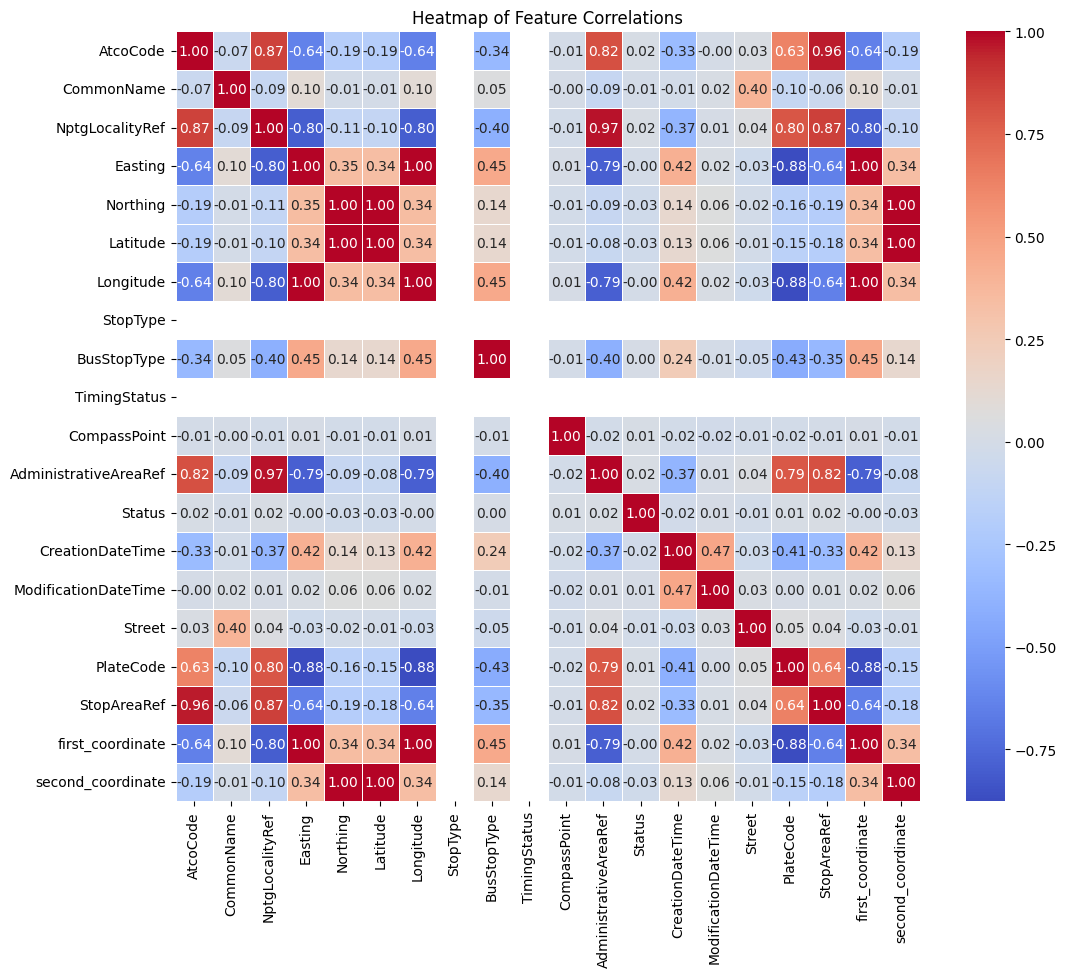

In [25]:
# Calculate the correlation matrix
correlation_matrix = df_ireland.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Feature Correlations')
plt.show()

## applying logistic regression model using a class

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, classification_report

class LogisticRegressionEvaluator:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test


    def evaluate_lr(self, model=None):
        if model is None:
            model = LogisticRegression()

        model.fit(self.X_train, self.y_train)

        y_pred = model.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)

        conf_matrix = confusion_matrix(self.y_test, y_pred)

        precision = precision_score(self.y_test, y_pred, average='micro')

        class_report = classification_report(self.y_test, y_pred)
        # print results
        print(f"Accuracy: {accuracy}")
        print("\nConfusion Matrix:")
        print(conf_matrix)
        print(f"\nPrecision: {precision:.2f}")
        print("\nClassification Report:")
        print(class_report)

    def random_search(self, param_distributions, n_iter=10, scoring='accuracy', cv=5):
        random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_distributions,
                                           n_iter=n_iter, scoring=scoring, cv=cv, random_state=42)
        random_search.fit(self.X_train, self.y_train)

        # print results
        print("Random Search Best Parameters:")
        print(random_search.best_params_)
        print("\n evaluate with better estimators: ")
        self.evaluate_lr(random_search.best_estimator_)

    def grid_search(self, param_grid, scoring='accuracy', cv=5):
        # Performing GridSearchCV
        grid_search = GridSearchCV(LogisticRegression(), param_grid=param_grid,
                                   scoring=scoring, cv=cv)
        grid_search.fit(self.X_train, self.y_train)

        # print results
        print("Grid Search Best Parameters:")
        print(grid_search.best_params_)
        print("\n evaluate with better estimators: ")
        self.evaluate_lr(grid_search.best_estimator_)

logistic_evaluator = LogisticRegressionEvaluator(X_train, X_test, y_train, y_test)

logistic_evaluator.evaluate_lr()

Accuracy: 0.9018895348837209

Confusion Matrix:
[[  18  103]
 [  32 1223]]

Precision: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.15      0.21       121
           1       0.92      0.97      0.95      1255

    accuracy                           0.90      1376
   macro avg       0.64      0.56      0.58      1376
weighted avg       0.87      0.90      0.88      1376



#### looking for hyperparameters with RandomizedSearchCV

In [27]:
# Perform RandomizedSearchCV
param_distributions_lr = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'max_iter': [100, 500, 1000],
    'random_state': [20,40,62],
    'solver': ['liblinear', 'saga'],  # Added solver options
    'fit_intercept': [True, False],    # Added fit_intercept option
    'class_weight': [None, 'balanced'],  # Added class_weight option
    'tol': [1e-4, 1e-3, 1e-2],  # Added tolerance option
    'warm_start': [False, True],  # Added warm_start option
    'l1_ratio': [None, 0.1, 0.5, 0.9],  # Added l1_ratio option

    #'C': np.logspace(-3, 3, 7),
    #'penalty': ['l1', 'l2'],
    #'solver': ['liblinear', 'saga']
}
logistic_evaluator.random_search(param_distributions_lr, n_iter=10)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/svm/_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio paramet

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logisti

Random Search Best Parameters:
{'warm_start': False, 'tol': 0.001, 'solver': 'saga', 'random_state': 62, 'penalty': 'l2', 'max_iter': 1000, 'l1_ratio': 0.9, 'fit_intercept': True, 'class_weight': None, 'C': 0.001}

 evaluate with better estimators: 


/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


Accuracy: 0.9120639534883721

Confusion Matrix:
[[   0  121]
 [   0 1255]]

Precision: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.91      1.00      0.95      1255

    accuracy                           0.91      1376
   macro avg       0.46      0.50      0.48      1376
weighted avg       0.83      0.91      0.87      1376



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

In [28]:
#line muted because it took a long time to execute.
#logistic_evaluator.grid_search(param_distributions_lr)

## Summary in logistic regression:

<ul>
   <li>First accuracy: 0.9018</li>
</ul>

<br>

<ul>
     <li>Random Search Best Parameters:
{'warm_start': False, 'tol': 0.001, 'solver': 'saga', 'random_state': 62, 'penalty': 'l2', 'max_iter': 1000, 'l1_ratio': 0.9, 'fit_intercept': True, 'class_weight': None, 'C': 0.001}
</li>
    <li>Accuracy: 0.9120</li>
</ul>

<br>
<ul>
  <li></li>
  
</ul>


### Apply dimensionality reduction methods using PCA

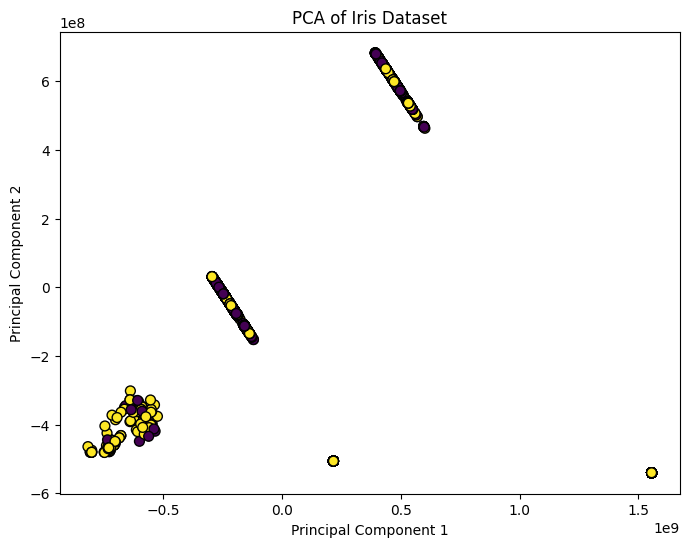

In [121]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

#### split data

In [122]:
X_train_svc, X_test_svc, y_train_svc, y_test_svc = train_test_split(X_pca, y, test_size=0.2, random_state=42)
X_train_svc.shape, X_test_svc.shape, y_train_svc.shape, y_test_svc.shape

((5503, 2), (1376, 2), (5503,), (1376,))

In [126]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC


class SVMClassifierWithCV:
    def __init__(self, X_train, X_test, y_train, y_test):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.model = None

    def train_model(self, kernel='rbf', C=1.0, gamma='scale'):
        self.model = SVC(kernel=kernel, C=C, gamma=gamma)
        self.model.fit(self.X_train, self.y_train)

    def cross_validate(self, cv=5):
        if self.model is not None:
            cv_scores = cross_val_score(self.model, self.X_train, self.y_train, cv=cv)
            mean_cv_score = np.mean(cv_scores)
            return mean_cv_score
        else:
            raise ValueError("Model has not been trained. Call train_model() first.")
            
    def plot_confusion_matrix(self):
        if self.model is not None:
            y_pred = self.model.predict(self.X_test)
            cm = confusion_matrix(self.y_test, y_pred)
            
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
            plt.title("Confusion Matrix")
            plt.xlabel("Predicted")
            plt.ylabel("Actual")
            plt.show()
        else:
            raise ValueError("Model has not been trained. Call train_model() first.")


Mean Cross-Validation Score: 0.9080502022954338


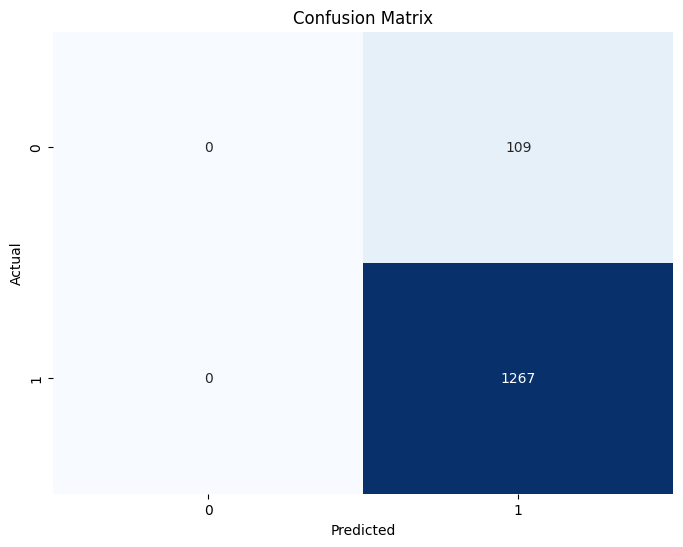

In [127]:
# Assuming you have X_train, X_test, y_train, and y_test already defined
svm_classifier = SVMClassifierWithCV(X_train_svc, X_test_svc, y_train_svc, y_test_svc)
svm_classifier.train_model()
cv_score = svm_classifier.cross_validate()
print(f"Mean Cross-Validation Score: {cv_score}")

svm_classifier.plot_confusion_matrix()

### Applying naives classifier creating a class with specific methods

In [29]:
from sklearn.dummy import DummyClassifier

class DummyClassifierEvaluator:
    def __init__(self, X_train, X_test, y_train, y_test, strategy='stratified'):
        self.X_train = X_train
        self.X_test = X_test
        self.y_train = y_train
        self.y_test = y_test
        self.strategy = strategy

    def evaluate(self, model=None, params=None):
        if model is None:
            model = DummyClassifier(strategy=self.strategy)

        model.fit(self.X_train, self.y_train)

        y_pred = model.predict(self.X_test)

        accuracy = accuracy_score(self.y_test, y_pred)

        conf_matrix = confusion_matrix(self.y_test, y_pred)

        precision = precision_score(self.y_test, y_pred, average='micro')

        class_report = classification_report(self.y_test, y_pred)

        print(f"Accuracy: {accuracy:}")
        print("\nConfusion Matrix:")
        print(conf_matrix)
        print(f"\nPrecision: {precision:.2f}")
        print("\nClassification Report:")
        print(class_report)

    def random_search(self, param_distributions, n_iter=10, scoring='accuracy', cv=5):
        random_search = RandomizedSearchCV(DummyClassifier(), 
                                           param_distributions=param_distributions,
                                           n_iter=n_iter, scoring=scoring, 
                                           cv=cv, random_state=42)
        random_search.fit(self.X_train, self.y_train)

        print("Random Search Best Parameters:")
        print(random_search.best_params_)
        print('\n')
        self.evaluate(random_search.best_estimator_)

    def grid_search(self, param_grid, scoring='accuracy', cv=5):
        grid_search = GridSearchCV(DummyClassifier(), param_grid=param_grid,
                                   scoring=scoring, cv=cv)
        grid_search.fit(self.X_train, self.y_train)

        print("Grid Search Best Parameters:")
        print(grid_search.best_params_)
        print('\n')
        self.evaluate(grid_search.best_estimator_)

evaluator_nc_irl = DummyClassifierEvaluator(X_train, X_test, y_train, y_test, strategy='stratified')

evaluator_nc_irl.evaluate()

Accuracy: 0.8379360465116279

Confusion Matrix:
[[  13  108]
 [ 115 1140]]

Precision: 0.84

Classification Report:
              precision    recall  f1-score   support

           0       0.10      0.11      0.10       121
           1       0.91      0.91      0.91      1255

    accuracy                           0.84      1376
   macro avg       0.51      0.51      0.51      1376
weighted avg       0.84      0.84      0.84      1376



#### hyperparameters with RandomizedSearchCV in naives

In [30]:
param_distributions_nc = {
    'strategy': ['stratified', 'most_frequent', 'uniform', 'constant'],
}
evaluator_nc_irl.random_search(param_distributions_nc, n_iter=10)


/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Random Search Best Parameters:
{'strategy': 'most_frequent'}


Accuracy: 0.9120639534883721

Confusion Matrix:
[[   0  121]
 [   0 1255]]

Precision: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.91      1.00      0.95      1255

    accuracy                           0.91      1376
   macro avg       0.46      0.50      0.48      1376
weighted avg       0.83      0.91      0.87      1376



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-p

#### hyperparameters with GridSearchCV in naives

In [31]:
evaluator_nc_irl.grid_search(param_distributions_nc)

Grid Search Best Parameters:
{'strategy': 'most_frequent'}


Accuracy: 0.9120639534883721

Confusion Matrix:
[[   0  121]
 [   0 1255]]

Precision: 0.91

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.91      1.00      0.95      1255

    accuracy                           0.91      1376
   macro avg       0.46      0.50      0.48      1376
weighted avg       0.83      0.91      0.87      1376



/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
5 fits failed out of a total of 20.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-p

## In summary for Naive classifier:
<ul>
   <li>first accuracy: 0.84</li>
</ul>

<br>

<ul>
     <li>Random Search Best Parameters:
{'strategy': 'most_frequent'}</li>
    <li>Accuracy: 0.91</li>
</ul>

<br>
<ul>
  <li>Grid Search Best Parameters:
{'strategy': 'most_frequent'}</li>
  <li>
    Accuracy: 0.91
  </li>
</ul>


# <h1>Data pre-processing of british dataset 🇬🇧</h1>

In [32]:
#LICENSE OF UK API :
#https://www.nationalarchives.gov.uk/doc/open-government-licence/version/3/

In [33]:
url = 'https://naptan.api.dft.gov.uk'
csv_format ='/v1/access-nodes?dataFormat=csv'

In [35]:
df_uk = pd.read_csv(url + csv_format)

/var/folders/13/lflfr2vd5yx56dpdvjrmqhbw0000gn/T/ipykernel_92417/1292567839.py:1: DtypeWarning: Columns (1,2,6,21,22,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df_uk = pd.read_csv(url + csv_format)


In [36]:
df_uk.head()

,ATCOCode,NaptanCode,PlateCode,CleardownCode,CommonName,CommonNameLang,ShortCommonName,ShortCommonNameLang,Landmark,LandmarkLang,...,TimingStatus,DefaultWaitTime,Notes,NotesLang,AdministrativeAreaCode,CreationDateTime,ModificationDateTime,RevisionNumber,Modification,Status
0,0100BRP90310,bstgwpa,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2023-04-21T18:02:19,99.0,new,active
1,0100BRP90311,bstgwpm,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-09-13T10:41:38,73.0,new,active
2,010000056,bstpjgw,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2019-08-06T00:00:00,2019-08-06T11:09:11,120.0,new,active
3,0100BRP90317,bstjada,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-08-06T11:10:46,49.0,new,active
4,0100BRP90318,bstgwtd,NaN,NaN,Temple Meads Stn,NaN,Temple Meads Stn,NaN,NaN,NaN,...,OTH,NaN,NaN,NaN,9,2009-08-25T00:00:00,2019-08-06T11:11:05,86.0,new,active


In [ ]:
df_uk.shape

In [ ]:
df_uk.info()

In [ ]:
#checking how many values are null per column
df_uk.isnull().sum()

In [ ]:
#Drop columns when the whole column has null values
column_names_uk = df_uk.columns

for column in column_names_uk:
    if df_uk[column].isnull().sum() == df_uk.shape[0]:
        df_uk.drop([column],axis=1,inplace=True)
        

In [ ]:
df_uk.shape

In [ ]:
# fill columns with general language
df_uk['SuburbLang'] = df_uk['SuburbLang'].fillna('EN')
df_uk['TownLang'] = df_uk['TownLang'].fillna('EN')

#fill empty values from another column 
df_uk['ShortCommonName'] = df_uk['ShortCommonName'].fillna(df_uk['CommonName'])
df_uk['ParentLocalityName'] = df_uk['ParentLocalityName'].fillna(df_uk['LocalityName'])
df_uk['Landmark'] = df_uk['Landmark'].fillna(df_uk['CommonName'])

#filling null values  with median value,using value and inplace parameters
df_uk['RevisionNumber'].fillna(value=df_uk['RevisionNumber'].median(),inplace=True)

#filling column with mode value
df_uk['Modification'].fillna(value=df_uk['Modification'].mode()[0],inplace=True)
df_uk['TimingStatus'].fillna(value=df_uk['TimingStatus'].mode()[0],inplace=True)
df_uk['Bearing'].fillna(value=df_uk['Bearing'].mode()[0],inplace=True)
#df_uk['BusStopType'].fillna(value=df_uk['BusStopType'].mode()[0],inplace=True) 

In [ ]:
df_uk.shape

In [ ]:
# It is better to remove unsual values different,because the column is about identifiers.

df_uk = df_uk[(df_uk['PlateCode'] != '-') & 
                (df_uk['PlateCode'] != 'none') & 
                (df_uk['PlateCode'] != '.') & 
                (df_uk['PlateCode'] != '/')]

# The column PlateCode has many repeated values.


In [ ]:
# The column PlateCode has many repeated values.
value_counts_uk = df_uk['PlateCode'].value_counts()
print('print values and occurrences: ',value_counts_uk)

#The next line will show which values has repeated number
repeated_values = value_counts_uk[value_counts_uk > 1]
print('\n')#to make space between prints
print('print list of values with occurence more than 1: ',repeated_values.unique())

In [ ]:
# Create a new DataFrame with only rows where the specified column has unique values
df_uk = df_uk[df_uk['PlateCode'].isin(value_counts_uk[value_counts_uk == 1].index)]

In [ ]:
# It confirm that there are no repeated values
df_uk['PlateCode'].value_counts()

In [ ]:
#Drop columns:

df_uk.dropna(subset=['BusStopType'],inplace=True)
df_uk.dropna(subset=['PlateCode'],inplace=True)
df_uk.dropna(subset=['NaptanCode'],inplace=True)
df_uk.dropna(subset=['Indicator'],inplace=True)
df_uk.dropna(subset=['Street'],inplace=True)
df_uk.dropna(subset=['Town'],inplace=True)
df_uk.dropna(subset=['Suburb'],inplace=True)


<center>
  <h2>Acoording to values in Indicator column</h2>
</center>
<img src="./indicator_reference.png" alt="Girl in a jacket" width="500" height="600">

## there are incoherences:
### some values are in uppercase, other ones in lowercase
### 'northbound' similar to 'North Bound'
### 'W- Bound' similar to 'w-Bound'
### 'Se-Bound' similar to 'SE - Bound'

In [ ]:
# Check unique values in column LocalityCentre:
df_uk['LocalityCentre'].unique()

In [ ]:
df_uk['LocalityCentre'] = df_uk['LocalityCentre'].str.lower().replace({'0': 'false', '1': 'true'})

In [ ]:
df_uk.dropna(subset=['LocalityCentre'],inplace=True)

df_uk['LocalityCentre'].unique()

In [ ]:
# Finally there is no empty values.
print(df_uk.shape)
df_uk.isnull().sum()

In [ ]:
df_uk.shape

In [ ]:
df_uk.head()

## encoding before using machine models

In [ ]:
df_uk.columns

In [ ]:
df_uk['ATCOCode'] = label_encoder.fit_transform(df_uk['ATCOCode'])
df_uk['NaptanCode'] = label_encoder.fit_transform(df_uk['NaptanCode'])
df_uk['PlateCode'] = label_encoder.fit_transform(df_uk['PlateCode'])
df_uk['CommonName'] = label_encoder.fit_transform(df_uk['CommonName'])
df_uk['ShortCommonName'] = label_encoder.fit_transform(df_uk['ShortCommonName'])
df_uk['Landmark'] = label_encoder.fit_transform(df_uk['Landmark'])
df_uk['Street'] = label_encoder.fit_transform(df_uk['Street'])
df_uk['Indicator'] = label_encoder.fit_transform(df_uk['Indicator'])
df_uk['Bearing'] = label_encoder.fit_transform(df_uk['Bearing'])
df_uk['NptgLocalityCode'] = label_encoder.fit_transform(df_uk['NptgLocalityCode'])
df_uk['LocalityName'] = label_encoder.fit_transform(df_uk['LocalityName'])
df_uk['ParentLocalityName'] = label_encoder.fit_transform(df_uk['ParentLocalityName'])
df_uk['Town'] = label_encoder.fit_transform(df_uk['Town'])
df_uk['TownLang'] = label_encoder.fit_transform(df_uk['TownLang'])
df_uk['Suburb'] = label_encoder.fit_transform(df_uk['Suburb'])
df_uk['SuburbLang'] = label_encoder.fit_transform(df_uk['SuburbLang'])
df_uk['LocalityCentre'] = label_encoder.fit_transform(df_uk['LocalityCentre'])
df_uk['GridType'] = label_encoder.fit_transform(df_uk['GridType'])
df_uk['StopType'] = label_encoder.fit_transform(df_uk['StopType'])
df_uk['BusStopType'] = label_encoder.fit_transform(df_uk['BusStopType'])
df_uk['TimingStatus'] = label_encoder.fit_transform(df_uk['TimingStatus'])
df_uk['Modification'] = label_encoder.fit_transform(df_uk['Modification'])
df_uk['Status'] = label_encoder.fit_transform(df_uk['Status'])


In [ ]:
from datetime import datetime
# Function to convert timestamp to numbers
def convert_to_numbers(timestamp):
    try:
        # Try converting with microseconds
        dt_obj = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S.%f')
    except ValueError:
        # If the above format fails, try without microseconds
        dt_obj = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S')

    # Get timestamp in seconds and cast to integer
    timestamp_seconds = int((dt_obj - datetime(1970, 1, 1)).total_seconds())

    # Replace values less than 1970 with 0
    return max(0, timestamp_seconds)

# Apply the conversion function to the 'timestamp' column
df_uk['CreationDateTime'] = df_uk['CreationDateTime'].apply(convert_to_numbers)
df_uk['ModificationDateTime'] = df_uk['ModificationDateTime'].apply(convert_to_numbers)

## Split dataset into train and test data

In [ ]:
X_uk = df_uk.drop(['BusStopType'], axis=1)
y_uk = df_uk['BusStopType']#BusStopType

# Split the data into training and testing sets
X_train_uk, X_test_uk, y_train_uk, y_test_uk = train_test_split(X_uk, y_uk, test_size=0.2, random_state=42)
X_train_uk.shape,X_test_uk.shape, y_train_uk.shape, y_test_uk.shape

### Apply decision naives classifier the class created with british dataset 

In [ ]:
evaluator_nc_uk = DummyClassifierEvaluator(X_train_uk, X_test_uk, y_train_uk, y_test_uk, strategy='stratified')

evaluator_nc_uk.evaluate()

In [ ]:
param_distributions_nc = {
    'strategy': ['stratified', 'most_frequent', 'uniform', 'constant'],
}
evaluator_nc_uk.random_search(param_distributions_nc, n_iter=10)



In [ ]:
evaluator_nc_uk.grid_search(param_distributions_nc)

## In summary for Naive classifier:
<ul>
   <li>first accuracy: 0.9416</li>
</ul>

<br>

<ul>
     <li>Random Search Best Parameters:
{'strategy': 'most_frequent'}</li>
    <li>Accuracy: 0.9771</li>
</ul>

<br>
<ul>
  <li>Grid Search Best Parameters:
{'strategy': 'most_frequent'}</li>
  <li>
    Accuracy: 0.9771
  </li>
</ul>

## applying logistic regression class in uk dataset

In [ ]:
logistic_evaluator_uk = LogisticRegressionEvaluator(X_train_uk, X_test_uk, y_train_uk, y_test_uk)

logistic_evaluator_uk.evaluate_lr() 

In [ ]:
# Perform RandomizedSearchCV
logistic_evaluator_uk.random_search(param_distributions_lr, n_iter=10)

In [ ]:
#line muted because it took a long time to execute
#logistic_evaluator_uk.grid_search(param_distributions_lr)

## Summary in logistic regression:

<ul>
   <li>First accuracy: 0.97</li>
</ul>

<br>

<ul>
     <li>Random Search Best Parameters:
{'warm_start': False, 'tol': 0.001, 'solver': 'saga', 'random_state': 62, 'penalty': 'l2', 'max_iter': 1000, 'l1_ratio': 0.9, 'fit_intercept': True, 'class_weight': None, 'C': 0.001}</li>
    <li>Accuracy with random: 0.9711</li>
</ul>

<br>


# I CREATED SVMClassifierWithCV using confussion matrix, cross validation to use poarameters like X_train... etc

## before that use LinearDiscriminantAnalysis as "dimensionality reduction methods
"
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Apply LDA to reduce the data to 2 linear discriminants
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X, y)

# Plot the transformed data
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('LDA of Iris Dataset')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.show()

In [ ]:
#merged_df.to_csv("example_merged_diesel.csv")

## STAY WORKING WITH NAPTAN DATABASE !!!! JUST MERGE BUS TYPE AND COMPARE YEARS :)

# Sentiment analysis

In [37]:
import praw
import pandas as pd
from datetime import datetime as dt
from dotenv import load_dotenv
from os import getenv

In [38]:
load_dotenv()


True

In [39]:
reddit = praw.Reddit(
    client_id=getenv("APP_ID"), # Right below 'personal use script'
    client_secret=getenv("APP_SECRET"), # secret
    user_agent=f"pda-2023 u/{getenv('USERNAME')}", # app-name u/username
)

In [40]:
print(reddit.read_only)

True


In [41]:
subreddit = reddit.subreddit("ireland")
subreddit

Subreddit(display_name='ireland')

In [42]:
#print(subreddit.display_name)
# If the api is not connected, the following will give a 401 error
#print(subreddit.title)#Experiences using Public transport in Ireland
#print(subreddit.description)

### create dataframe about reddit comments

In [43]:
from textblob import TextBlob

# Function to fetch comments from a post URL
def get_comments_from_url(post_url):
    submission = reddit.submission(url=post_url)
    
    submission.comments.replace_more(limit=None)
    
    return [comment.body for comment in submission.comments.list()]

post_urls = [
    'https://www.reddit.com/r/ireland/comments/btiude/dublin_set_to_get_first_24hour_bus_service/',
    'https://www.reddit.com/r/irishtourism/comments/17y3yl5/experiences_using_public_transport_in_ireland/',
    'https://www.reddit.com/r/ireland/comments/pw746x/irelands_public_transport_is_a_joke_compared_to/',
    'https://www.reddit.com/r/ireland/comments/wfvins/we_dont_all_need_electric_cars_we_need_less_cars/',
]

comments_list = []
for url in post_urls:
    comments_list.extend(get_comments_from_url(url))

sentiments = [TextBlob(comment).sentiment.polarity for comment in comments_list]

# 0 if the sentiment is less than 0,
# 1 if the sentiment is equal to 0,
# 2 if the sentiment is greater than 0.
labels = [0 if sentiment < 0 else 1 if sentiment == 0 else 2 for sentiment in sentiments]

data = {'comment': comments_list, 'sentiment': sentiments, 'category': labels}
df_comment = pd.DataFrame(data)

#df.to_csv('dataframe_comments_created.csv')
print(df_comment)

                                                comment  sentiment  category
0     I keep preaching but a Night Luas on the weeke...   0.206667         2
1                                             [deleted]   0.000000         1
2     This is great but I’d love if they extended ho...   0.500000         2
3     Airport buses should be the first ones top get...   0.500000         2
4     Finally a 24hr service from the airport, it's ...   0.173333         2
...                                                 ...        ...       ...
1193  It's very difficult to have a conversation wit...   0.033810         2
1194  One-off housing is practically non-existent in...  -0.141667         0
1195  Please tell me how plopping a bungalow there p...   0.000000         1
1196  Urban planning and economics have allowed them...   0.005833         2
1197  And do you think the modern world is anyway si...   0.066667         2

[1198 rows x 3 columns]


## Data Pre Processing

In [44]:
df_comment.shape

(1198, 3)

In [45]:
df_comment.head()

,comment,sentiment,category
0,I keep preaching but a Night Luas on the weeke...,0.206667,2
1,[deleted],0.000000,1
2,This is great but I’d love if they extended ho...,0.500000,2
3,Airport buses should be the first ones top get...,0.500000,2
4,"Finally a 24hr service from the airport, it's ...",0.173333,2


In [46]:
#check if there are repeated values
df_comment['comment'].value_counts()

comment
[deleted]                                                                                                                                                                                                                                                                                                                                                                        61
Fewer*                                                                                                                                                                                                                                                                                                                                                                            4
*fewer cars                                                                                                                                                                                                                                             

In [47]:
# Drop rows with repeated values in the specified column
df_comment.drop_duplicates(subset='comment', keep=False, inplace=True)

In [48]:
df_comment['comment'].value_counts()

comment
I keep preaching but a Night Luas on the weekend would be amazing. Just have it run once per hour like 1:11 2:22 and 3:33 so people can get home easy and safe. Too often especially when it rains I am unable to get a cab for ages after a night out.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   1
Maybe it would be a good idea to kill yourself. No one wants your comment here anyway.                                                                                                                                              

In [49]:
print(df_comment)

                                                comment  sentiment  category
0     I keep preaching but a Night Luas on the weeke...   0.206667         2
2     This is great but I’d love if they extended ho...   0.500000         2
3     Airport buses should be the first ones top get...   0.500000         2
4     Finally a 24hr service from the airport, it's ...   0.173333         2
5     Why the fuck has this taken so long to be real...  -0.036061         0
...                                                 ...        ...       ...
1193  It's very difficult to have a conversation wit...   0.033810         2
1194  One-off housing is practically non-existent in...  -0.141667         0
1195  Please tell me how plopping a bungalow there p...   0.000000         1
1196  Urban planning and economics have allowed them...   0.005833         2
1197  And do you think the modern world is anyway si...   0.066667         2

[1125 rows x 3 columns]


In [65]:
# columns to use
X_comment = df_comment['comment']
y_comment = df_comment['category']


In [66]:
import nltk

from nltk.corpus import stopwords
nltk.download('stopwords')

import string
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fernandoleniz/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [58]:
stop_words = stopwords.words('english')

# list of punctuation
punct = string.punctuation

# initalize object 
stemmer = PorterStemmer()

print(punct)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [56]:
import re

cleaned_data=[]

# preprocessing before using the model 
for i in range(len(X_comment)):
    comment = re.sub('[^a-zA-Z]', ' ', X.iloc[i])
    comment = comment.lower().split()
    comment = [stemmer.stem(word) for word in comment if (word not in stop_words) and (word not in punct)]
    comment = ' '.join(comment)
    cleaned_data.append(comment)

In [57]:
cleaned_data

['keep preach night lua weekend would amaz run per hour like peopl get home easi safe often especi rain unabl get cab age night',
 'great love extend hour sunday away whole sunday servic thing tri get work bu mad',
 'airport buse first one top get honestli edit goe though airport',
 'final hr servic airport absolut ridicul fli dublin pm good luck tri get around without forc pay fortun taxi',
 'fuck taken long realiz go gig midnight movi even drink late town weekday pain ars live alreadi easi way home everyon live weekend',
 'fuckin hell took till',
 'great news hope see cork great controversi take bu easi campaign probabl bit overkil id like see gener extens rout oper time seem moment let get night train least bu substitut night lua',
 'make x run later honestli mental end earli',
 'took midnight bu go anywher',
 'person would done bu sinc goe length citi start',
 'includ buse e c',
 'one cork honestli great bring complet home within short walk distanc save fortun taxi fare',
 'naa hou

In [62]:
from sklearn.feature_extraction.text import CountVectorizer

# Instantiate an object cv by calling a method named as CountVectorzer()
cv = CountVectorizer(ngram_range = (1, 2), stop_words = 'english', min_df = 20)

X_fin = cv.fit_transform(cleaned_data).toarray()

# Display the rows and colums
X_fin.shape

(1125, 224)

#### split the data

In [77]:
#split the data before using machien learning model
X_train_comment, X_test_comment, y_train_comment, y_test_comment = train_test_split(X_fin, y_comment, test_size = 0.2,random_state=42)
X_train_comment.shape, X_test_comment.shape, y_train_comment.shape, y_test_comment.shape

((900, 224), (225, 224), (900,), (225,))

#### apply macvhine learning model 

In [78]:
from sklearn.naive_bayes import MultinomialNB

# Instantiate an object model by calling a method MultinomialNB()
model_comment = MultinomialNB()

model_comment.fit(X_train_comment,y_train_comment)

y_pred_comment = model_comment.predict(X_test_comment)
#y_pred_comment

# Evaluate the model
accuracy_comment = accuracy_score(y_test_comment, y_pred_comment)
print(f"Accuracy: {accuracy_comment}")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_comment, y_pred_comment))

Accuracy: 0.52
Classification Report:
              precision    recall  f1-score   support

           0       0.39      0.28      0.33        46
           1       0.25      0.08      0.12        52
           2       0.57      0.79      0.66       127

    accuracy                           0.52       225
   macro avg       0.40      0.38      0.37       225
weighted avg       0.46      0.52      0.47       225



In [79]:
# Define the parameter grid
param_grid_mn = {'alpha': [0.01,0.1, 0.5, 1.0, 1.5, 2.0]}

# Create the Multinomial Naive Bayes classifier
clf_mn = MultinomialNB()

# Create GridSearchCV
grid_search_mn = GridSearchCV(clf_mn, param_grid_mn, cv=5, scoring='accuracy')

# Fit the model to the data
grid_search_mn.fit(X_fin, y_comment)

# Print the best parameters and their corresponding accuracy
print("Best Hyperparameters:", grid_search_mn.best_params_)
print("Best Accuracy:", grid_search_mn.best_score_)

Best Hyperparameters: {'alpha': 0.01}
Best Accuracy: 0.5537777777777777


In [72]:
model_lg_comment = LogisticRegression(max_iter = 1000, random_state = 0)
model_lg_comment.fit(X_train_comment, y_train_comment)

LogisticRegression(max_iter=1000, random_state=0)

In [73]:
# new instnace of LogisticRegressionEvaluator 
logistic_evaluator_comment = LogisticRegressionEvaluator(X_train_comment, X_test_comment, y_train_comment, y_test_comment)

logistic_evaluator_comment.evaluate_lr()

Accuracy: 0.5798816568047337

Confusion Matrix:
[[ 20  14  35]
 [  7  43  24]
 [ 28  34 133]]

Precision: 0.58

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.29      0.32        69
           1       0.47      0.58      0.52        74
           2       0.69      0.68      0.69       195

    accuracy                           0.58       338
   macro avg       0.51      0.52      0.51       338
weighted avg       0.58      0.58      0.58       338



In [80]:
# Apply hyperparameters with RandomizedSearchCV
logistic_evaluator_comment.random_search(param_distributions_lr, n_iter=10)

/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1172: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)
  warnings.warn(
/Users/fernandoleniz/anaconda3/envs/python_10/lib/python3.10/site-packages/sklearn/linear_model/_logisti

Random Search Best Parameters:
{'warm_start': False, 'tol': 0.001, 'solver': 'liblinear', 'random_state': 62, 'penalty': 'l2', 'max_iter': 1000, 'l1_ratio': None, 'fit_intercept': True, 'class_weight': 'balanced', 'C': 0.01}

 evaluate with better estimators: 
Accuracy: 0.6094674556213018

Confusion Matrix:
[[  2   7  60]
 [  0  29  45]
 [  2  18 175]]

Precision: 0.61

Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.03      0.05        69
           1       0.54      0.39      0.45        74
           2       0.62      0.90      0.74       195

    accuracy                           0.61       338
   macro avg       0.55      0.44      0.41       338
weighted avg       0.58      0.61      0.54       338



# USAR TRES LINKS PONERLOS EN MONGO Y USAR TODO JUNTO PARA HACER SENTIMENT ANALYSIS !!

## https://www.reddit.com/r/ireland/comments/9ewg6p/bus_connects_any_questions/

### submission_url = 'https://www.reddit.com/r/ireland/comments/pw746x/irelands_public_transport_is_a_joke_compared_to/'.format(subreddit_name)

### submission_url = "https://www.reddit.com/r/ireland/comments/wfvins/we_dont_all_need_electric_cars_we_need_less_cars/".format(subreddit_name)



In [ ]:
# Fetch and print the comments
comments_first_link = []
for comment in submission.comments.list():
    print(comment.body)
    

In [ ]:
for collection in reddit.subreddit("ireland").collections:
    print(collection.permalink)

In [ ]:
#for comment in reddit.subreddit("irishtourism").comments(limit=100):
    #print(comment.author)

In [ ]:
#for submission in reddit.subreddit("irishtourism").top(limit=25):
    #print(submission.title)

In [ ]:
#for post in subreddit.top():
    #print(post.title)

In [ ]:
#for post in subreddit.top(limit=10): # New, Hot, Top, 
    #print("***************")
    #print(post.title)
    #print(post.comments)
#     print(list(post.comments))
    #for comment in list(post.comments):
        #print(comment.body)
        #print(comment.created_utc)
       # print(dt.fromtimestamp(comment.created_utc))
      #  print("---------")
#     print("in the indent")
# print("outside the indent")

In [ ]:
post_found = reddit.submission(id="17y3yl5")

In [ ]:
post_found = reddit.submission(id="17y3yl5")

#for comment in post_found.comments:
 #   print("---------comment---------")
  #  print("comment: ",comment.body)
   # print("autor: ", comment.author)
    #print("comments DATE: ",comment.created_utc)
    #print("comments FULL NAME: ",comment.)
    #print("\n")

In [ ]:
#print("total_comments: ",total_comments)

 PART 2, STATISTICS, DO SAMPLING AND THEN PROVE HYPOTHESIS

PART 3 OF STATISTICS: Justify reasons of ANNOVA.

In [ ]:
## random normal to use normal distribution.... 
## poison distributiom for specific distribtution.. to find the prob if they are happened or not
## random.poison =====> function..... 

## binomial distro= ., describe dist about two possibilities... yes or no.